In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, svm

In [4]:
# importing the Forest Types Training Dataset
df_tr = pd.read_csv('training.csv') #Dataframe for training.csv

#Extract the training targets
y_df_tr = df_tr[['class']]
y_train=y_df_tr.values
y_train=y_train.reshape(-1)
print(type(y_train),y_train.shape)
#print(y_train)

#Extract the training data
df_tr.drop(['class'],1,inplace=True)
X_train = df_tr.values

print(type(X_train),X_train.shape)
#print(X_train)

<class 'numpy.ndarray'> (198,)
<class 'numpy.ndarray'> (198, 27)


In [8]:
# importing the Forest Types Testing Dataset
df_ts = pd.read_csv('testing.csv') #Dataframe for testing.csv

#Extract the testing targets
y_df_ts = df_ts[['class']]
y_test=y_df_ts.values
y_test=y_test.reshape(-1)
print(type(y_test),y_test.shape)
#print(y_test)

#Extract the testing data
df_ts.drop(['class'],1,inplace=True)
X_test = df_ts.values

print(type(X_test),X_test.shape)
#print(X_test)

#Concatenate Train and test datasets
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
print(type(y),y.shape)
print(type(X),X.shape)
#print(X[y != 0, :2])

<class 'numpy.ndarray'> (325,)
<class 'numpy.ndarray'> (325, 27)
<class 'numpy.ndarray'> (523,)
<class 'numpy.ndarray'> (523, 27)


In [9]:
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target

X = X[y != 0, :2]
y = y[y != 0]
print(X[y != 0, :2])

n_sample = len(X)

[[39. 36.]
 [84. 30.]
 [53. 25.]
 ...
 [49. 26.]
 [55. 26.]
 [71. 28.]]


In [10]:
np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

(200, 200)


ValueError: cannot reshape array of size 160000 into shape (200,200)

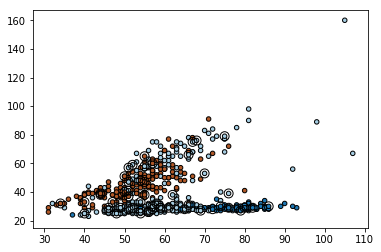

In [20]:
# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('normal')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    print(XX.shape)
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()